# TSF - GRIP - Data Science and Business Analytics Internship
   <b> 
Intern : Harshil Deepak Patel

Task6 - Prediction using Decision Tree Algorithm
    
Problem Statement - Creation of Decision Tree classifier which predicts class based on data & visualizing the same graphically.
        <b>

Step1 : Importing libraries and dataset
Step2 : Checking for duplicated and null values
Step3 : Splitting data into training and test sets after finding correlation between attributes
Step4 : Finding the accuracy and confusion matrix for testing and training sets
Step5 : Building the decision tree model and evaluating it
Step6 : Visualizing decision tree and evaluating the model
Step7 : Conclusion
Dataset : https://bit.ly/3kXTdox

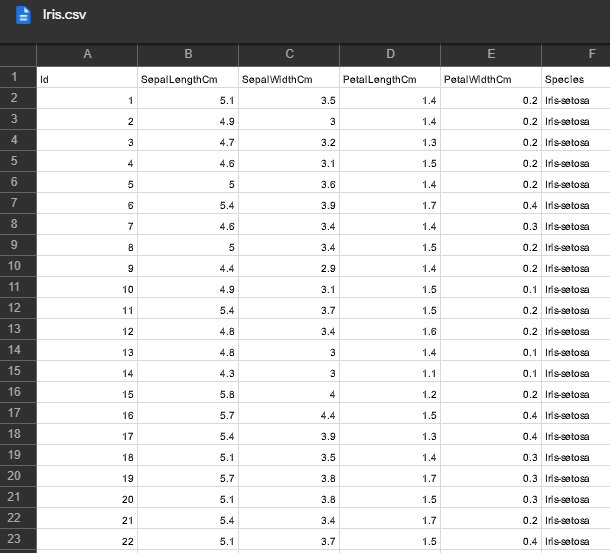

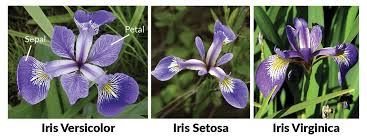

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
#from sklearn.datasets import load_iris
%matplotlib inline

In [2]:
data = sns.load_dataset('iris')

In [3]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
data.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
142,5.8,2.7,5.1,1.9,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#Checking for null values
data.isnull().sum() 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
#Checking for duplicated values
data.duplicated().sum()
data[data.duplicated()==True]
data.drop_duplicates(inplace=True)

In [13]:
data.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [14]:
data.species.value_counts() #virginica had the duplicated value which was dropped earlier

setosa        50
versicolor    50
virginica     49
Name: species, dtype: int64

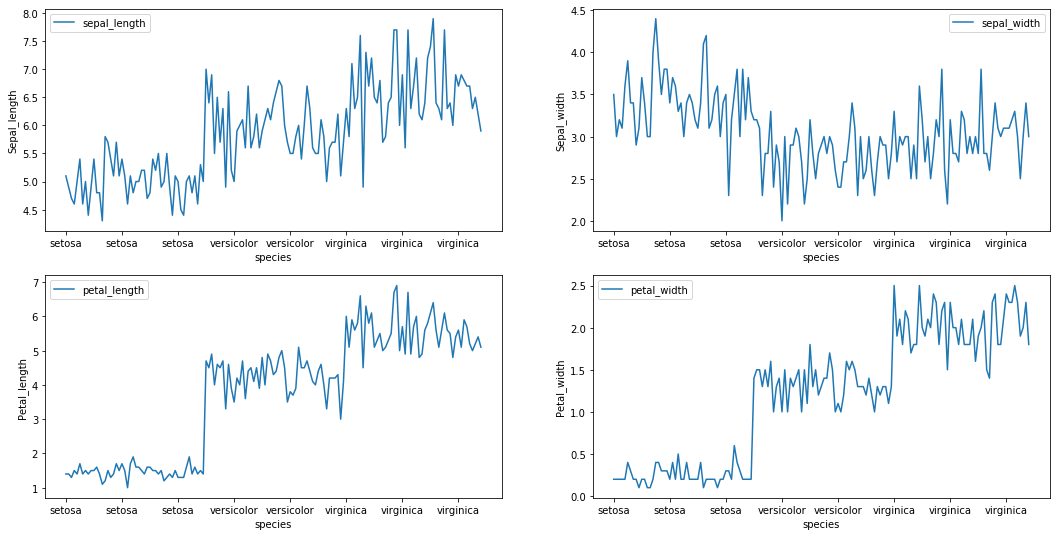

In [17]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

data.plot(kind='line', x='species',y='sepal_length', figsize=(18, 9),ax=ax1) 
ax1.set_xlabel('species')
ax1.set_ylabel('Sepal_length')

data.plot(kind='line', x='species',y='sepal_width', figsize=(18, 9),ax=ax2) 
ax2.set_ylabel('Sepal_width')
ax2.set_xlabel('species')

data.plot(kind='line', x='species',y='petal_length',figsize=(18,9), ax=ax3) 
ax3.set_ylabel('Petal_length')
ax3.set_xlabel('species')

data.plot(kind='line', x='species',y='petal_width',figsize=(18,9),ax=ax4) 
ax4.set_ylabel('Petal_width')
ax4.set_xlabel('species')

plt.show()

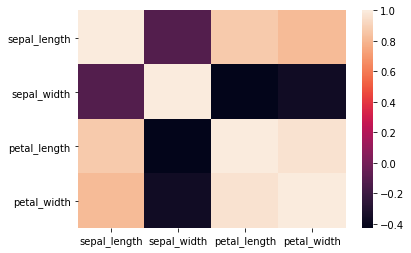

In [18]:
#Now that visualization of iris flower attributes are done we try and find correlation between them
correlation = data.corr()
sns.heatmap(correlation)

In [19]:
# Splitting the dataset into train & test data using train_test_split. We first check for dependent & independent parts of dataset
X = data[['sepal_length','sepal_width','petal_length','petal_width']].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [21]:
Y=data['species']
Y[0:5]

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(119, 4)
(119,)
(30, 4)
(30,)


In [24]:
#Modeling the data using Decision Tree
DCT = DecisionTreeClassifier(criterion='gini',max_depth=3)
#Note than the max depth is 3

<b>Decision Trees are a type of Supervised ML where the data is continuously split according to a certain parameter. The tree can be explained by decision nodes and leaves. The leaves are the decisions or the final outcomes & decision nodes are where the data is split. Main types of DCT are classification & regression<b>

<b>Gini index and entropy are the criteria for calculating information gain. Decision tree algorithms use information gain to split a node. Both gini and entropy are measures of impurity of a node. A node having multiple classes is impure whereas a node having only one class is pure.<b>

In [25]:
#Fitting the training data into our model
DCT.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
#Predicting the target species for our trained data 
prediction_tree = DCT.predict(x_train)

In [31]:
# Accuracy of training data = 0.975
from sklearn import metrics
print(metrics.accuracy_score(y_train,prediction_tree))

0.9747899159663865


In [30]:
#Calculating the confusion matrix for training data
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train,prediction_tree))

[[33  0  0]
 [ 0 42  2]
 [ 0  1 41]]


<b>In the field of ML & statistical classification, a confusion matrix (error matrix) is a specific table layout that allows visualization of the performance of an algorithm. It is often used to describe the performance of a classification model (or classifier) on a set of test data for which the true values are known.<b>

In [32]:
# Accuracy of testing data = 0.97
prediction_tree = DCT.predict(x_test)
print(metrics.accuracy_score(y_test,prediction_tree))

0.9666666666666667


In [34]:
#Calculating the confusion matrix for testing data 
print(confusion_matrix(y_test,prediction_tree))

[[17  0  0]
 [ 0  5  1]
 [ 0  0  7]]


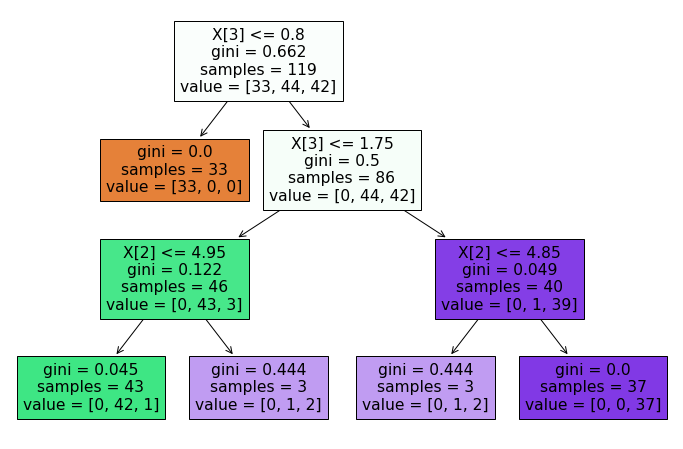

In [35]:
#Visualizing the Decision Tree
from sklearn import tree
plt.figure(figsize=(12,8))
fig = tree.plot_tree(DCT,filled=True)

In [40]:
#Evaluating the model based on decision tree
input  = [6.7,3.0,5.2,2.3]
print(DCT.predict([input])[0])

virginica


# Conclusion

<b>The task was to built a decision tree classifier to predict the class of iris dataset and visualizing it. We processed the data, checked for null and duplicated values,checked for correlations, split the dataset, model the data using decision tree, calculating the accuracy and confusion matrix and finally visualized the decision tree. We also evaluate the model to check if the DCT predicts correctly.<b>